**МУРМАНСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ**

**Институт арктических технологий**

**Кафедра Цифровых технологии, математики и экономики**

Дисциплина Компьютерное моделирование

**Лабораторная работа №1**

**Тема**: Моделирование вращения плоской фигуры с постоянной скоростью вокруг своего центра тремя способами: приращением, табличным и аналитическим.

**Выполнил**: студент группы ИВТб18о-1, Корнилов Владислав Валерьевич

**Дата защиты**: 08.11.2021

**Задание**:

1. В процессе визуализации результатов моделирования освоить возможности библиотеки matplotlib по построению динамических изображений (видеоряда).
2. Выполнить моделирование вращения плоской фигуры с постоянной скоростью вокруг своего центра тремя способами: приращением, табличным и аналитическим.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fps = 20

#a = int(input("Сторона квадрата: "))
a = 5
a /= 2
#psi = float(input("Угловая скорость: "))
psi = 360
#N = int(input("Число секунд: "))
N = 3

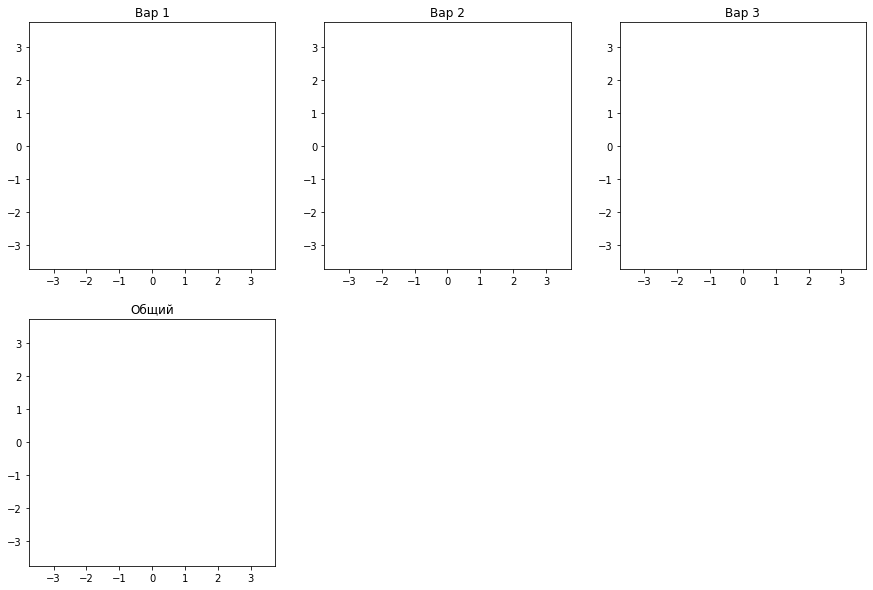

In [4]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,3,1)   
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)

borders = (-a * 1.5, a * 1.5)
ax1.set(xlim = borders, ylim = borders, title = "Вар 1")
ax2.set(xlim = borders, ylim = borders, title = "Вар 2")         
ax3.set(xlim = borders, ylim = borders, title = "Вар 3")
ax4.set(xlim = borders, ylim = borders, title = "Общий")


line1, = ax1.plot([], [], 'r', lw=2)
line2, = ax2.plot([], [], 'g', lw=2)
line3, = ax3.plot([], [], 'b', lw=2)

line1_comm, = ax4.plot([], [], 'r', lw=2, ls='solid', label='Приращение')    
line2_comm, = ax4.plot([], [], 'g', lw=5, ls='solid', label='Табличный')
line3_comm, = ax4.plot([], [], 'b', lw=2, ls='dashdot', label='Аналитический')

#x = np.array(0, 1)
#y = np.array(0, 1)



In [5]:
import math
def rotatePoint(point, angle):
    px, py = point
    angle = math.radians(angle)
    sin, cos = math.sin(angle), math.cos(angle)

    rx = cos * px - sin * py
    ry = sin * px + cos * py
    return (rx, ry)

In [6]:
# таблица предрассчитанных значений

def calcTable(numOfVals):
    xvals = []
    yvals = []
    for i in range(numOfVals):
        x, y = rotatePoint((a, a), i * 360 / numOfVals)
        xvals.append(x)
        yvals.append(y)
    xvals.append(a)
    yvals.append(a)
    return np.array([xvals, yvals])

numOfVals = 40
table = calcTable(numOfVals)
print(table)
from prettytable import PrettyTable

[[ 2.50000000e+00  2.07813469e+00  1.60509880e+00  1.09254006e+00
   5.53079355e-01  0.00000000e+00 -5.53079355e-01 -1.09254006e+00
  -1.60509880e+00 -2.07813469e+00 -2.50000000e+00 -2.86030701e+00
  -3.15018378e+00 -3.36249256e+00 -3.49200562e+00 -3.53553391e+00
  -3.49200562e+00 -3.36249256e+00 -3.15018378e+00 -2.86030701e+00
  -2.50000000e+00 -2.07813469e+00 -1.60509880e+00 -1.09254006e+00
  -5.53079355e-01 -6.66133815e-16  5.53079355e-01  1.09254006e+00
   1.60509880e+00  2.07813469e+00  2.50000000e+00  2.86030701e+00
   3.15018378e+00  3.36249256e+00  3.49200562e+00  3.53553391e+00
   3.49200562e+00  3.36249256e+00  3.15018378e+00  2.86030701e+00
   2.50000000e+00]
 [ 2.50000000e+00  2.86030701e+00  3.15018378e+00  3.36249256e+00
   3.49200562e+00  3.53553391e+00  3.49200562e+00  3.36249256e+00
   3.15018378e+00  2.86030701e+00  2.50000000e+00  2.07813469e+00
   1.60509880e+00  1.09254006e+00  5.53079355e-01  2.22044605e-16
  -5.53079355e-01 -1.09254006e+00 -1.60509880e+00 -2.0781

In [7]:
def getValueFromTable(angle):
    step = int(360 / numOfVals)
    index = int(angle / step) % numOfVals
    #print(step, index)
    gapX = table[0][index + 1] - table[0][index]
    gapY = table[1][index + 1] - table[1][index]
    fraction = angle % step / step
    x = table[0][index] + gapX * fraction
    y = table[1][index] + gapY * fraction
    return (x, y)

In [8]:
def getAllSquarePositions(actualX, actualY):
    point1 = (actualX, actualY)
    point2 = (-actualY, actualX)
    point3 = (-actualX, -actualY)
    point4 = (actualY, -actualX)
    x = np.array((point1[0], point2[0], point3[0], point4[0], point1[0]))
    y = np.array((point1[1], point2[1], point3[1], point4[1], point1[1]))
    return (x, y)

Метод 1 - приращение координат.
Данный метод по заданным текущим координатам угла квадрата и углу смещения, определяет положение квадрата в следующий момент времени.

In [9]:
def method1(fargs):
    point = fargs[0]
    #print(fargs, fargs[0], point, tmp)
    #print(type(fargs), type(fargs[0]))
    deltaAngle = np.deg2rad(psi / fps)
    # синус малого угла примем равным этому углу, тогда dAngle = dx / a
    #dX = a * deltaAngle
    dX = a * math.sin(deltaAngle)
    # найдем нормальный вектор текущего вектора к точке
    normal = (-point[1], point[0])
    # переведем в единичный вектор
    normal /= np.linalg.norm(normal)
    # умножив единичный вектор на величину перехода, получим вектор перемещения точки
    normal *= dX
    # сдвигаем точку
    point += normal
    # из-за перехода на прямой угол, вектор стал длиннее, возвращаем на нужную длину
    hypot = (a**2 * 2) ** 0.5
    point = point / np.linalg.norm(point) * hypot
    # записываем новое состояние для следующего шага
    fargs[0][0] = point[0]
    fargs[0][1] = point[1]

    x, y = getAllSquarePositions(point[0], point[1])
    #print(x, y)
    line1.set_data(x, y)
    line1_comm.set_data(x, y)

Метод 2 - положение по указанному углу.
Данный метод по заданному углу наклона получает из предрассчитанной таблицы координаты угла квадрата и рассчитывает текущее положение.

In [10]:
def method2(desiredAngle):
    actualX, actualY = getValueFromTable(desiredAngle)
    x, y = getAllSquarePositions(actualX, actualY)
    line2.set_data(x, y)
    line2_comm.set_data(x, y)

Метод 3 - положение по указанному углу.
Данный метод по заданному углу наклона рассчитывает координаты угла квадрата, используя тригонометрические функции.

In [11]:
def method3(desiredAngle):
    actualX, actualY = rotatePoint((-a, a), desiredAngle)
    x, y = getAllSquarePositions(actualX, actualY)
    line3.set_data(x, y)
    line3_comm.set_data(x, y)

In [12]:
# animation function. This is called sequentially
def drawframe(n, *fargs):
    desiredAngle = n * psi / fps

    # вариант 1 - переход по изменению на дельту
    method1(fargs)

    # вариант 2 - данные из таблицы
    method2(desiredAngle)

    # вариант 3 - нахождение координат тригонометрически
    method3(desiredAngle)
    
    return (line1,line2,line3, line1_comm, line2_comm, line3_comm)
#args = ((a, a), 1)
#drawframe(1, args)

In [13]:

from matplotlib import animation
from matplotlib import rc

lastPoint = [a, a]
dummy = 0
anim = animation.FuncAnimation(fig, drawframe, fargs=(lastPoint, dummy), frames = fps * N, interval = 1000 / fps, blit=True)
rc('animation', html='jshtml')
anim